    • sku_id – уникальный идентификатор товара
    • price – цена, по которой был продан товар
    • number – количество товаров (если не топливо), значит где 0 - топливо
    • cheque_id – уникальный идентификатор чека
    • litrs – количество литров (если товар - топливо)
    • client_id – уникальный идентификатор клиента (если клиент «представился» при покупке)
    • shop_id – уникальный идентификатор магазина
    • date – дата транзакции
    • full_name – полное наименование товара
    • brand – наименование торговой марки
    • sku_group – группа, к которой принадлежит товар
    • OTM – признак собственной торговой марки
    • units – единица измерения для количества 
    • country – страна производства товара

In [4]:
#pip install matplotlib seaborn tqdm

Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
     |████████████████████████████████| 76 kB 742 kB/s            
     |████████████████████████████████| 39.8 MB 1.5 MB/s            
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
import seaborn as sns
import math, re, tqdm

%matplotlib inline

In [5]:
# Посмотрим на пропуски
file = 'transactions.parquet'
df_tran = pd.read_parquet(file, engine='pyarrow')
df_tran.isnull().sum()
#display(df_tran.dtypes)
#df_tran.head(5)

sku_id             0
price              0
number             0
cheque_id          0
litrs              0
client_id    3772355
shop_id            0
date               0
dtype: int64

In [6]:
# Заменим nan на 0 для более удобного представления данных
df_tran['client_id'] = df_tran['client_id'].fillna(0)

In [7]:
df_tran.isnull().sum()
# Вот так симпатичнее.

sku_id       0
price        0
number       0
cheque_id    0
litrs        0
client_id    0
shop_id      0
date         0
dtype: int64

In [8]:
# client id во флоате, интересно. Поменяем на инт.
display(df_tran.dtypes)

sku_id                int64
price               float64
number              float64
cheque_id             int64
litrs               float64
client_id           float64
shop_id               int64
date         datetime64[ns]
dtype: object

In [9]:
# cid - ид клиента, если что
# кастуем клаент ид в инт
df_tran['client_id'] = df_tran['client_id'].astype(int)
df_tran.head(2)

,sku_id,price,number,cheque_id,litrs,client_id,shop_id,date
0,1158,0.002335,0.0,3338297,0.147929,78634,102,2171-07-23
1,1158,0.002317,0.0,3386107,0.134562,20900,101,2171-07-23


In [10]:
# удаление похожих записей, если есть
print("До: {}".format(len(df_tran)))

До: 7620119


In [11]:
df_tran.drop_duplicates(subset=None, keep='first', inplace=True)

In [12]:
print("После: {}".format(len(df_tran)))

После: 6800919


In [13]:
# Сортировка по дате, ну и вообще в условии сказано про анализ покупок за 5 месяцев, 
# поэтому было бы хорошо ещё один collumn добавить
df_tran = df_tran.sort_values(by='date')
df_tran.head(2)

,sku_id,price,number,cheque_id,litrs,client_id,shop_id,date
7620118,1158,0.002270,0.000000,1764664,0.159197,192548,77,2171-03-01
7585450,3324,0.006106,0.000452,2262585,0.104183,345359,96,2171-03-01


In [20]:
# тот самый collumn
df_tran['month'] = df_tran['date'].apply(lambda d: d.month)
df_tran.head(2)

,sku_id,price,number,cheque_id,litrs,client_id,shop_id,date,month
7620118,1158,0.002270,0.000000,1764664,0.159197,192548,77,2171-03-01,3
7585450,3324,0.006106,0.000452,2262585,0.104183,345359,96,2171-03-01,3


<AxesSubplot:xlabel='count', ylabel='month'>

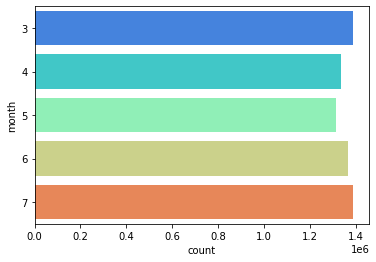

In [19]:
sns.countplot(data=df_tran, y='month', palette='rainbow')
# отобразим данные на каунтплоте

In [21]:
file = 'nomenclature.parquet'
df_nom = pd.read_parquet(file, engine='pyarrow')
df_nom.head(2)

,sku_id,full_name,brand,sku_group,OTM,units,country
0,0,Масло Lubricrol Magnatec Diesel 10W-40 B4 1л,Lubricrol,Масла моторные (для варповых двигателей),Нет,unknown,ГЕРМАНИЯ
1,723,Трос УранПРОМEthereum буксировочный 4500кг,УранПРОМEthereum,Автотовары,Да,шт,РОССИЯ


In [22]:
df_nom.isnull().sum()
# Тоже самое что и пред.таблица, только ещё лучше

sku_id       0
full_name    9
brand        9
sku_group    0
OTM          9
units        9
country      9
dtype: int64

In [ ]:
# пустые значения
holind = []
# отобразим все не нулевые данные 
for col in df_nom.columns:
    holind = [*holind, *df_nom[df_nom[col].isna()].index.values]
    
holind = list(set(holind))
df_nom.head(2)